In [14]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import os
import pandas as pd
import chardet
import numpy as np

In [2]:
os.chdir('Downloads')

In [3]:
file_path = "50012_right hip_102373_2024-11-27 15-23-42.csv"

# Open the file and skip the first 100 rows
with open(file_path, 'rb') as file:
    # Skip the first 100 rows
    for _ in range(100):
        next(file)
    
    # Read a chunk of the remaining file to detect encoding
    sample = file.read(5000)  # Read 5000 bytes for detection
    result = chardet.detect(sample)
    detected_encoding = result['encoding']

print(f"Detected Encoding: {detected_encoding}")

Detected Encoding: ascii


In [4]:
file_path = "50012_right hip_102373_2024-11-27 15-23-42.csv"

# Detect file encoding
with open(file_path, 'rb') as file:
    # Skip the first 100 rows
    for _ in range(99):
        next(file)
    
    # Read a chunk of the remaining file to detect encoding
    sample = file.read(5000)  # Read 5000 bytes for detection
    result = chardet.detect(sample)
    detected_encoding = result['encoding']

# Fallback if the detected encoding doesn't work
fallback_encodings = ['utf-8', 'latin1', 'ISO-8859-1']

for encoding in [detected_encoding] + fallback_encodings:
    try:
        df = pd.read_csv(file_path, skiprows=99, encoding=encoding, on_bad_lines='skip')
        print(f"Successfully loaded the file with encoding: {encoding}")
        break
    except UnicodeDecodeError as e:
        print(f"Failed with encoding {encoding}: {e}")
else:
    print("Failed to load the file with all tested encodings.")

Failed with encoding ascii: 'ascii' codec can't decode byte 0xff in position 122880: ordinal not in range(128)
Successfully loaded the file with encoding: utf-8


In [6]:
df.head()

,A,B,C,D,E,F,G
0,2024-11-26 14:23:12:010,-0.2247,-0.6449,-0.1583,55,0,29.2
1,2024-11-26 14:23:12:020,-0.1323,-0.8529,-0.0989,55,0,29.2
2,2024-11-26 14:23:12:030,-0.1885,-1.0809,-0.2771,55,0,29.2
3,2024-11-26 14:23:12:040,-0.0601,-0.9849,-0.0237,55,0,29.2
4,2024-11-26 14:23:12:050,-0.1524,-0.9169,-0.1385,55,0,29.2


In [5]:
new_column_names = ['A', 'B', 'C', 'D', 'E','F','G']  

current_header = df.iloc[0]

# Drop the first row and reset the index
df = df.iloc[1:].reset_index(drop=True)

df.loc[-1] = current_header  
df.index = df.index + 1      
df = df.sort_index()        

df.columns = new_column_names

In [73]:
def detect_sudden_movement(data, threshold=5.0):
    """
    Detect indices of sudden movements based on threshold.

    Parameters:
        data (np.ndarray): A 2D array where each row is a vector of accelerometer readings.
        threshold (float): The magnitude threshold to detect sudden movement.

    Returns:
        np.ndarray: Indices of rows where the magnitude exceeds the threshold.
    """
    data = np.asarray(data)
    
    # Compute magnitudes of each row
    magnitudes = np.sqrt(np.sum(data**2, axis=1))
    
    # Find indices where magnitude exceeds the threshold
    sudden_movement_indices = np.where(magnitudes > threshold)[0]
    
    return sudden_movement_indices

In [74]:
detect_sudden_movement(df[['B','C','D']])

array([  75282,   84584,   84585,  110317,  132286,  232260,  240866,
        240867,  921581,  921582,  922853,  922854,  923702,  923703,
        933137,  938129, 1182445, 1186605, 1326519, 1344061, 1359272,
       1365981, 1366014, 1366015, 1366163, 1704318, 1749228, 1809832,
       1900833, 1904150, 1904151, 1904189, 1904276, 1904624, 4009048,
       5658968, 5658969, 5658999, 5659000, 6256979, 6378310, 6502549,
       6502610, 6505724, 6505725, 6505726, 6505727, 6505748, 6505749,
       6505758, 6518972, 6616858, 6616863, 6715021, 6904517, 6944552,
       6944588, 6944593, 7980230, 7980264, 7980265, 7980296, 8195356,
       8195357, 8304875, 8305318, 8325426, 8375099, 8376734], dtype=int64)

In [106]:
ls = detect_sudden_movement(df[['B','C','D']],5).tolist()

ls[0:10]

[75282, 84584, 84585, 110317, 132286, 232260, 240866, 240867, 921581, 921582]

In [120]:
ls

[75282,
 84584,
 84585,
 110317,
 132286,
 232260,
 240866,
 240867,
 921581,
 921582,
 922853,
 922854,
 923702,
 923703,
 933137,
 938129,
 1182445,
 1186605,
 1326519,
 1344061,
 1359272,
 1365981,
 1366014,
 1366015,
 1366163,
 1704318,
 1749228,
 1809832,
 1900833,
 1904150,
 1904151,
 1904189,
 1904276,
 1904624,
 4009048,
 5658968,
 5658969,
 5658999,
 5659000,
 6256979,
 6378310,
 6502549,
 6502610,
 6505724,
 6505725,
 6505726,
 6505727,
 6505748,
 6505749,
 6505758,
 6518972,
 6616858,
 6616863,
 6715021,
 6904517,
 6944552,
 6944588,
 6944593,
 7980230,
 7980264,
 7980265,
 7980296,
 8195356,
 8195357,
 8304875,
 8305318,
 8325426,
 8375099,
 8376734]

In [126]:
df.iloc[1809832]

A    2024-11-26 19:27:57.260000
B                       -0.4977
C                       -3.0246
D                        5.0765
E                             0
F                             0
G                          27.0
Name: 1809832, dtype: object

In [170]:
check_df = df.iloc[1799000:1809833]

In [171]:
df2_check = df2.iloc[1799000:1809833]

In [172]:
final_df = check_df.reset_index().merge(df2_check, how="left").set_index('index')

In [173]:
final_df.head(1)

,A,B,C,D,E,F,G,360 angle,Up/down angle,Body Rotation,Prone-sit class,Supine-recline class,Overall class
index,,,,,,,,,,,,,
1799000,2024-11-26 19:26:08.940,-1.0075,0.4149,0.2693,0,0,26.2,75.034962,21.694851,prone-sit,prone,,prone


In [175]:
final_df['Acceleration'] = np.sqrt(final_df['B']**2 + final_df['C']**2 + final_df['D']**2)

In [159]:
final_df

,A,B,C,D,E,F,G,360 angle,Up/down angle,Body Rotation,Prone-sit class,Supine-recline class,Overall class,Acceleration
index,,,,,,,,,,,,,,
1799000,2024-11-26 19:26:08.940,-1.0075,0.4149,0.2693,0,0,26.2,75.034962,21.694851,prone-sit,prone,,prone,1.122373
1799001,2024-11-26 19:26:08.950,-1.0116,0.4149,0.2654,0,0,26.2,75.299380,21.639037,prone-sit,prone,,prone,1.125128
1799002,2024-11-26 19:26:08.960,-1.0075,0.3949,0.2456,0,0,26.2,76.300109,20.847277,prone-sit,prone,,prone,1.109649
1799003,2024-11-26 19:26:08.970,-0.9955,0.3949,0.2495,0,0,26.2,75.929906,21.045934,prone-sit,prone,,prone,1.099644
1799004,2024-11-26 19:26:08.980,-0.9674,0.4029,0.2139,0,0,26.2,77.532036,22.129379,prone-sit,prone,,prone,1.069553
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1809827,2024-11-26 19:27:57.210,0.1447,0.0909,-1.0453,0,0,27.0,187.881319,4.923264,supine-recline,,left side,left side,1.059176
1809828,2024-11-26 19:27:57.220,0.0805,0.0829,-1.0295,0,0,27.0,184.471048,4.589832,supine-recline,,left side,left side,1.035965
1809829,2024-11-26 19:27:57.230,0.0363,0.0869,-0.9978,0,0,27.0,182.083504,4.974148,supine-recline,,left side,left side,1.002235


In [ ]:
-7.84 to -9.81

In [181]:
final_df[final_df['Acceleration']>2]

,A,B,C,D,E,F,G,360 angle,Up/down angle,Body Rotation,Prone-sit class,Supine-recline class,Overall class,Acceleration
index,,,,,,,,,,,,,,
1809092,2024-11-26 19:27:49.860,-0.7907,-1.8647,-1.0057,0,0,27.0,141.824914,-55.547209,supine-recline,,reclined,reclined,2.261359
1809100,2024-11-26 19:27:49.940,-0.2327,-1.9927,-0.4434,0,0,27.0,152.309138,-75.894033,supine-recline,,reclined,reclined,2.054655
1809799,2024-11-26 19:27:56.930,0.0443,-1.2768,-1.9798,0,0,27.0,181.281836,-32.811990,supine-recline,,left side,left side,2.356223
1809800,2024-11-26 19:27:56.940,-0.2568,-1.9527,-2.3045,0,0,27.0,173.641526,-40.101726,supine-recline,,reclined,reclined,3.031452
1809801,2024-11-26 19:27:56.950,-0.7948,-1.4608,-2.2214,0,0,27.0,160.313177,-31.764347,supine-recline,,left side,left side,2.774935
1809802,2024-11-26 19:27:56.960,-0.7948,-0.8969,-1.8848,0,0,27.0,157.135367,-23.675964,supine-recline,,left side,left side,2.233519
1809832,2024-11-26 19:27:57.260,-0.4977,-3.0246,5.0765,0,0,27.0,5.599383,-30.666300,prone-sit,upright,,upright,5.930157


In [127]:
df.iloc[1749228]

A    2024-11-26 19:14:44.290000
B                        1.1002
C                       -5.2562
D                       -0.9582
E                             0
F                             0
G                          26.5
Name: 1749228, dtype: object

In [104]:
to_check = []
cnt = 0 
i = 1 
while i<len(ls):
    while ls[i] == ls[i-1]+1:
        cnt+=1
        if cnt>=40:
            to_check.append(ls[i])
        i+=1
    i+=1

In [105]:
to_check

[1704319,
 1778989,
 1809836,
 1904151,
 1904190,
 2016540,
 4009048,
 4009049,
 5658969,
 5658970,
 5659000,
 5674085,
 5674086,
 6256980,
 6322670,
 6378311,
 6378312,
 6500548,
 6505659,
 6505660,
 6505661,
 6505662,
 6505663,
 6505664,
 6505725,
 6505726,
 6505727,
 6505749,
 6505759,
 6505772,
 6505773,
 6518975,
 6616859,
 6616864,
 6616868,
 6675660,
 6675789,
 6904456,
 6944593,
 7980265,
 7980296,
 8195357,
 8199527,
 8199528,
 8199529,
 8325092,
 8325426,
 8325427,
 8375100,
 8376070,
 8376071,
 8376072,
 8449393,
 8449394,
 8449395,
 8449396,
 8449397]

In [7]:
df.tail()

,A,B,C,D,E,F,G
8451201,2024-11-27 13:54:50:950,-0.2247,-0.9769,-0.1187,148,0,26.5
8451202,2024-11-27 13:54:50:960,-0.3130,-1.0809,-0.0237,148,0,26.5
8451203,2024-11-27 13:54:50:970,-0.2969,-1.0209,0.0001,148,0,26.5
8451204,2024-11-27 13:54:50:980,-0.2929,-1.0169,0.0714,148,0,26.5
8451205,2024-11-27 13:54:50:990,-0.1404,-1.0329,-0.1662,148,0,26.5


In [189]:
def process_dataset(df):    
    df = df['A','B','C','D','G']
    df['360 angle'] = np.nan
    df['Up/down angle'] = np.nan
    df['Body Rotation'] = ""
    df['Prone-sit class'] = ""
    df['Supine-recline class'] = ""
    df['Overall class'] = ""
    df['Acceleration'] = ""
    
    S5 = 140
    
    df['Acceleration'] = np.sqrt(df['B']**2 + df['C']**2 + df['D']**2)
    
    # Calculate '360 angle' and 'Up/down angle' with error handling for division by zero
    df['360 angle'] = np.where(
        (df['B']**2 + df['D']**2) != 0,
        np.sign(df['B']) * np.degrees(np.arccos(-df['D'] / np.sqrt(df['B']**2 + df['D']**2))) + 180,
        np.nan
    )

    df['Up/down angle'] = np.where(
        (df['B']**2 + df['C']**2 + df['D']**2) != 0,
        np.degrees(np.arcsin(df['C'] / np.sqrt(df['B']**2 + df['C']**2 + df['D']**2))),
        np.nan
    )

    # Determine 'Body Rotation' status
    df['Body Rotation'] = np.where(
        (df['360 angle'] > S5) & (df['360 angle'] < (S5 + 180)),
        'supine-recline',
        'prone-sit'
    )

    # Calculate 'Prone-sit class' using np.select for the entire dataframe
    prone_sit_conditions = [
        df['Up/down angle'] > 0,
        df['Up/down angle'] > -23,
        df['Up/down angle'] > -63
    ]
    prone_sit_choices = ['prone', 'prone supported', 'upright']

    df['Prone-sit class'] = np.select(
        prone_sit_conditions, 
        prone_sit_choices, 
        default='sitting'
    )

    # Apply condition only to rows where Body Rotation is 'prone-sit'
    df.loc[df['Body Rotation'] != 'prone-sit', 'Prone-sit class'] = ""

    # Calculate 'Supine-recline class' using np.select for the entire dataframe
    supine_recline_conditions = [
        df['Up/down angle'] > 15,
        df['Up/down angle'] < -36,
        df['360 angle'] < (S5 + 69),
        df['360 angle'] > (S5 + 101)
    ]
    supine_recline_choices = ['upsidedown', 'reclined', 'left side', 'right side']

    df['Supine-recline class'] = np.select(
        supine_recline_conditions, 
        supine_recline_choices, 
        default='supine'
    )

    # Apply condition only to rows where Body Rotation is 'supine-recline'
    df.loc[df['Body Rotation'] != 'supine-recline', 'Supine-recline class'] = ""

    # Combine 'Prone-sit class' and 'Supine-recline class' to form 'Overall class'
    df['Overall class'] = (df['Prone-sit class'] + ' ' + df['Supine-recline class']).str.strip()

    # Drop rows with missing or NaN values in specific columns
    df = df.dropna(subset=['A', 'B', 'C', 'D'])

    return df

In [190]:
# After changing the process_dataset function 
df3 = process_dataset(df)

Conclusions: Analyzing GENEActiv data using temperature (>25.6°C) and z-axis (greater than -0.812g) cut points can be used to determine wear time among infants for the purpose of measuring tummy time.

In [193]:
-0.812*9.8

-7.957600000000001

In [194]:
df3[(df3['G']>25.6)&(df3['D']>-7.95760)]

,A,B,C,D,E,F,G,360 angle,Up/down angle,Body Rotation,Prone-sit class,Supine-recline class,Overall class,Acceleration
0,2024-11-26 14:23:12.010,-0.2247,-0.6449,-0.1583,55,0,29.2,125.164500,-66.915894,prone-sit,sitting,,sitting,0.701031
1,2024-11-26 14:23:12.020,-0.1323,-0.8529,-0.0989,55,0,29.2,126.779712,-79.039282,prone-sit,sitting,,sitting,0.868748
2,2024-11-26 14:23:12.030,-0.1885,-1.0809,-0.2771,55,0,29.2,145.774119,-72.773770,supine-recline,,reclined,reclined,1.131663
3,2024-11-26 14:23:12.040,-0.0601,-0.9849,-0.0237,55,0,29.2,111.521438,-86.247079,prone-sit,sitting,,sitting,0.987017
4,2024-11-26 14:23:12.050,-0.1524,-0.9169,-0.1385,55,0,29.2,132.264331,-77.341652,prone-sit,sitting,,sitting,0.939741
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8451201,2024-11-27 13:54:50.950,-0.2247,-0.9769,-0.1187,148,0,26.5,117.845698,-75.418559,prone-sit,sitting,,sitting,1.009412
8451202,2024-11-27 13:54:50.960,-0.3130,-1.0809,-0.0237,148,0,26.5,94.330108,-73.806574,prone-sit,sitting,,sitting,1.125556
8451203,2024-11-27 13:54:50.970,-0.2969,-1.0209,0.0001,148,0,26.5,89.980702,-73.784415,prone-sit,sitting,,sitting,1.063196
8451204,2024-11-27 13:54:50.980,-0.2929,-1.0169,0.0714,148,0,26.5,76.300244,-73.486664,prone-sit,sitting,,sitting,1.060648


In [197]:
((8415801*10)/1000)/3600

23.377225

In [199]:
8451206 - 8415801

35405

In [201]:
(35405/100)/60

5.900833333333334

# Non Wear Type 

In [232]:
non_wear = df3[~((df3['G'] > 25.6) & (df3['D'] > -7.95760))]

In [234]:
non_wear = non_wear.reset_index()
non_wear.head()

,index,A,B,C,D,E,F,G,360 angle,Up/down angle,Body Rotation,Prone-sit class,Supine-recline class,Overall class,Acceleration
0,922854,2024-11-26 16:57:00.550,0.1808,-1.3888,-8.0739,0,0,31.8,181.282818,-9.757597,supine-recline,,left side,left side,8.194469
1,923703,2024-11-26 16:57:09.040,2.7061,-1.3888,-8.0739,0,0,31.8,198.529421,-9.263047,supine-recline,,left side,left side,8.627839
2,1365981,2024-11-26 18:10:51.820,3.6135,8.1896,-8.0739,0,0,28.2,204.111057,42.794605,supine-recline,,upsidedown,upsidedown,12.054659
3,1874606,2024-11-26 19:38:45.000,0.2531,0.0869,-0.9463,0,0,25.5,194.973993,5.069612,supine-recline,,left side,left side,0.983410
4,1874607,2024-11-26 19:38:45.010,0.2772,0.0829,-0.9542,0,0,25.5,196.198852,4.769136,supine-recline,,left side,left side,0.997101


In [231]:
non_wear[non_wear['consecutive']]

,index,A,B,C,D,E,F,G,360 angle,Up/down angle,Body Rotation,Prone-sit class,Supine-recline class,Overall class,Acceleration,consecutive,group
0,922854,2024-11-26 16:57:00.550,0.1808,-1.3888,-8.0739,0,0,31.8,181.282818,-9.757597,supine-recline,,left side,left side,8.194469,True,1
4,1874607,2024-11-26 19:38:45.010,0.2772,0.0829,-0.9542,0,0,25.5,196.198852,4.769136,supine-recline,,left side,left side,0.997101,True,3
5,1874608,2024-11-26 19:38:45.020,0.2611,0.0949,-0.9621,0,0,25.5,195.183539,5.437891,supine-recline,,left side,left side,1.001407,True,3
6,1874609,2024-11-26 19:38:45.030,0.2451,0.1069,-0.9582,0,0,25.5,194.348157,6.168778,supine-recline,,left side,left side,0.994811,True,3
7,1874610,2024-11-26 19:38:45.040,0.2451,0.0989,-0.9384,0,0,25.5,194.638023,5.822400,supine-recline,,left side,left side,0.974910,True,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35398,1910001,2024-11-26 19:44:38.950,0.2370,0.0150,-0.9859,0,0,25.5,193.516832,0.847521,supine-recline,,left side,left side,1.014097,True,3
35399,1910002,2024-11-26 19:44:38.960,0.2210,-0.0730,-0.9582,0,0,25.5,192.987629,-4.245599,supine-recline,,left side,left side,0.986061,True,3
35400,1910003,2024-11-26 19:44:38.970,0.5863,0.0230,-0.8077,0,0,25.5,215.975459,1.320129,supine-recline,,supine,supine,0.998327,True,3
35401,1910004,2024-11-26 19:44:38.980,0.9476,0.2389,-0.7404,0,0,25.5,231.997982,11.236112,supine-recline,,supine,supine,1.226055,True,3


In [228]:
non_wear['consecutive'] = non_wear['index'].diff().fillna(1) == 1

non_wear['group'] = (non_wear['consecutive'] != non_wear['consecutive'].shift()).cumsum()
consecutive_groups = non_wear[non_wear['consecutive']].groupby('group').size()

last_indices = (
    non_wear[non_wear['group'].isin(consecutive_groups[consecutive_groups >= 20].index)]
    .groupby('group')
    .last()['index']
)

In [257]:
non_wear

,index,A,B,C,D,E,F,G,360 angle,Up/down angle,Body Rotation,Prone-sit class,Supine-recline class,Overall class,Acceleration,index_diff
0,922854,2024-11-26 16:57:00.550,0.1808,-1.3888,-8.0739,0,0,31.8,181.282818,-9.757597,supine-recline,,left side,left side,8.194469,NaN
1,923703,2024-11-26 16:57:09.040,2.7061,-1.3888,-8.0739,0,0,31.8,198.529421,-9.263047,supine-recline,,left side,left side,8.627839,849.0
2,1365981,2024-11-26 18:10:51.820,3.6135,8.1896,-8.0739,0,0,28.2,204.111057,42.794605,supine-recline,,upsidedown,upsidedown,12.054659,442278.0
3,1874606,2024-11-26 19:38:45.000,0.2531,0.0869,-0.9463,0,0,25.5,194.973993,5.069612,supine-recline,,left side,left side,0.983410,508625.0
4,1874607,2024-11-26 19:38:45.010,0.2772,0.0829,-0.9542,0,0,25.5,196.198852,4.769136,supine-recline,,left side,left side,0.997101,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35400,1910003,2024-11-26 19:44:38.970,0.5863,0.0230,-0.8077,0,0,25.5,215.975459,1.320129,supine-recline,,supine,supine,0.998327,1.0
35401,1910004,2024-11-26 19:44:38.980,0.9476,0.2389,-0.7404,0,0,25.5,231.997982,11.236112,supine-recline,,supine,supine,1.226055,1.0
35402,1910005,2024-11-26 19:44:38.990,1.1082,0.3909,-0.8354,0,0,25.5,232.989733,15.730829,supine-recline,,upsidedown,upsidedown,1.441806,1.0
35403,6944552,2024-11-27 09:43:44.460,8.2425,0.4669,-8.0739,0,0,26.5,225.592025,2.317272,supine-recline,,supine,supine,11.547496,5034547.0


In [238]:
# df['consecutive'] = df['index'].diff().fillna(1).astype(int) == 1

non_wear['index_diff'] = non_wear['index'].diff()

In [261]:
non_wear[non_wear['index_diff']==1].head()

,index,A,B,C,D,E,F,G,360 angle,Up/down angle,Body Rotation,Prone-sit class,Supine-recline class,Overall class,Acceleration,index_diff
4,1874607,2024-11-26 19:38:45.010,0.2772,0.0829,-0.9542,0,0,25.5,196.198852,4.769136,supine-recline,,left side,left side,0.997101,1.0
5,1874608,2024-11-26 19:38:45.020,0.2611,0.0949,-0.9621,0,0,25.5,195.183539,5.437891,supine-recline,,left side,left side,1.001407,1.0
6,1874609,2024-11-26 19:38:45.030,0.2451,0.1069,-0.9582,0,0,25.5,194.348157,6.168778,supine-recline,,left side,left side,0.994811,1.0
7,1874610,2024-11-26 19:38:45.040,0.2451,0.0989,-0.9384,0,0,25.5,194.638023,5.822400,supine-recline,,left side,left side,0.974910,1.0
8,1874611,2024-11-26 19:38:45.050,0.2611,0.1029,-0.9661,0,0,25.5,195.123559,5.870622,supine-recline,,left side,left side,1.006037,1.0


In [263]:
non_wear[non_wear['index_diff']==1].tail()

,index,A,B,C,D,E,F,G,360 angle,Up/down angle,Body Rotation,Prone-sit class,Supine-recline class,Overall class,Acceleration,index_diff
35398,1910001,2024-11-26 19:44:38.950,0.2370,0.0150,-0.9859,0,0,25.5,193.516832,0.847521,supine-recline,,left side,left side,1.014097,1.0
35399,1910002,2024-11-26 19:44:38.960,0.2210,-0.0730,-0.9582,0,0,25.5,192.987629,-4.245599,supine-recline,,left side,left side,0.986061,1.0
35400,1910003,2024-11-26 19:44:38.970,0.5863,0.0230,-0.8077,0,0,25.5,215.975459,1.320129,supine-recline,,supine,supine,0.998327,1.0
35401,1910004,2024-11-26 19:44:38.980,0.9476,0.2389,-0.7404,0,0,25.5,231.997982,11.236112,supine-recline,,supine,supine,1.226055,1.0
35402,1910005,2024-11-26 19:44:38.990,1.1082,0.3909,-0.8354,0,0,25.5,232.989733,15.730829,supine-recline,,upsidedown,upsidedown,1.441806,1.0


In [265]:
1910005-1874607

35398

In [245]:
idx_ls = non_wear[non_wear['index_diff']==1]['index'].tolist()

In [254]:
cnt = 0
res = []
i = 0  
while i < len(idx_ls) - 1:  
    if idx_ls[i+1] == idx_ls[i] + 1:
        cnt += 1
        i += 1
    else:
        res.append((idx_ls[i], cnt))  
        cnt = 0
        i += 1
if cnt > 0:
    res.append((idx_ls[i], cnt))

In [255]:
res

[(1910005, 35398)]

In [256]:
idx_ls

[1874607,
 1874608,
 1874609,
 1874610,
 1874611,
 1874612,
 1874613,
 1874614,
 1874615,
 1874616,
 1874617,
 1874618,
 1874619,
 1874620,
 1874621,
 1874622,
 1874623,
 1874624,
 1874625,
 1874626,
 1874627,
 1874628,
 1874629,
 1874630,
 1874631,
 1874632,
 1874633,
 1874634,
 1874635,
 1874636,
 1874637,
 1874638,
 1874639,
 1874640,
 1874641,
 1874642,
 1874643,
 1874644,
 1874645,
 1874646,
 1874647,
 1874648,
 1874649,
 1874650,
 1874651,
 1874652,
 1874653,
 1874654,
 1874655,
 1874656,
 1874657,
 1874658,
 1874659,
 1874660,
 1874661,
 1874662,
 1874663,
 1874664,
 1874665,
 1874666,
 1874667,
 1874668,
 1874669,
 1874670,
 1874671,
 1874672,
 1874673,
 1874674,
 1874675,
 1874676,
 1874677,
 1874678,
 1874679,
 1874680,
 1874681,
 1874682,
 1874683,
 1874684,
 1874685,
 1874686,
 1874687,
 1874688,
 1874689,
 1874690,
 1874691,
 1874692,
 1874693,
 1874694,
 1874695,
 1874696,
 1874697,
 1874698,
 1874699,
 1874700,
 1874701,
 1874702,
 1874703,
 1874704,
 1874705,
 1874706,


# Other 

In [200]:
df3['A'].max() - df3['A'].min()

Timedelta('0 days 23:31:38.980000')

In [188]:
df3[df3['Acceleration']>=5]

,A,B,C,D,360 angle,Up/down angle,Body Rotation,Prone-sit class,Supine-recline class,Overall class,Acceleration
75282,2024-11-26 14:35:44.830,0.7429,-4.8483,-5.0249,188.409901,-43.665818,supine-recline,,reclined,reclined,7.021932
84584,2024-11-26 14:37:17.850,2.8266,-5.1002,-4.2171,213.832802,-45.131906,supine-recline,,reclined,reclined,7.196224
84585,2024-11-26 14:37:17.860,1.0841,-5.1242,-1.4690,216.426770,-70.389392,supine-recline,,reclined,reclined,5.439730
110317,2024-11-26 14:41:35.180,-1.1561,-4.9203,-1.7977,147.254949,-66.520088,supine-recline,,reclined,reclined,5.364480
132286,2024-11-26 14:45:14.870,-0.2287,-3.0086,-4.2012,176.884075,-35.567422,supine-recline,,left side,left side,5.172433
...,...,...,...,...,...,...,...,...,...,...,...
8304875,2024-11-27 13:30:27.690,-2.7941,0.7988,8.1414,18.942041,5.302010,prone-sit,prone,,prone,8.644505
8305318,2024-11-27 13:30:32.120,-2.1638,-0.2130,6.0070,19.809684,-1.910697,prone-sit,prone supported,,prone supported,6.388384
8325426,2024-11-27 13:33:53.200,1.6583,-5.4922,-0.2058,262.925593,-73.077430,supine-recline,,reclined,reclined,5.740782
8375099,2024-11-27 13:42:09.930,-2.0393,-6.4960,-2.9262,145.126948,-61.230490,supine-recline,,reclined,reclined,7.410763


In [16]:
df2 = process_dataset(df)

In [17]:
df2.head()

,A,B,C,D,360 angle,Up/down angle,Body Rotation,Prone-sit class,Supine-recline class,Overall class
0,2024-11-26 14:23:12:010,-0.2247,-0.6449,-0.1583,125.164500,-66.915894,prone-sit,sitting,,sitting
1,2024-11-26 14:23:12:020,-0.1323,-0.8529,-0.0989,126.779712,-79.039282,prone-sit,sitting,,sitting
2,2024-11-26 14:23:12:030,-0.1885,-1.0809,-0.2771,145.774119,-72.773770,supine-recline,,reclined,reclined
3,2024-11-26 14:23:12:040,-0.0601,-0.9849,-0.0237,111.521438,-86.247079,prone-sit,sitting,,sitting
4,2024-11-26 14:23:12:050,-0.1524,-0.9169,-0.1385,132.264331,-77.341652,prone-sit,sitting,,sitting


In [24]:
df2[df2['360 angle']<10]

,A,B,C,D,360 angle,Up/down angle,Body Rotation,Prone-sit class,Supine-recline class,Overall class
25,2024-11-26 14:23:12:260,-0.0360,-1.0089,0.2218,9.219190,-77.443998,prone-sit,sitting,,sitting
38,2024-11-26 14:23:12:390,-0.0119,-1.1209,0.1743,3.905699,-81.141041,prone-sit,sitting,,sitting
39,2024-11-26 14:23:12:400,-0.0159,-1.0289,0.2377,3.826873,-76.963478,prone-sit,sitting,,sitting
7680,2024-11-26 14:24:28:810,-0.0119,-1.0009,0.0753,8.980441,-85.644422,prone-sit,sitting,,sitting
7705,2024-11-26 14:24:29:060,-0.0119,-1.0049,0.1585,4.293647,-81.011927,prone-sit,sitting,,sitting
...,...,...,...,...,...,...,...,...,...,...
8450694,2024-11-27 13:54:45:880,-0.0159,-0.7489,0.2218,4.100303,-73.462386,prone-sit,sitting,,sitting
8450827,2024-11-27 13:54:47:210,-0.0119,-1.0369,0.4079,1.671063,-68.517807,prone-sit,sitting,,sitting
8450862,2024-11-27 13:54:47:560,-0.0601,-0.9889,0.3644,9.365405,-69.520931,prone-sit,sitting,,sitting
8451160,2024-11-27 13:54:50:540,-0.0159,-1.0329,0.2693,3.378933,-75.362674,prone-sit,sitting,,sitting


In [29]:
df["A"] = pd.to_datetime(df["A"], format="%Y-%m-%d %H:%M:%S:%f")

In [54]:
df2["A"] = pd.to_datetime(df2["A"], format="%Y-%m-%d %H:%M:%S:%f")

# Define time range
start_time = "19:25:00.000"
end_time = "19:27:00.000"

# Filter rows within the time range
filtered_df = df[df["A"].dt.strftime("%H:%M:%S.%f").between(start_time, end_time)]

# Display filtered rows
filtered_df

,A,B,C,D,E,F,G
1792106,2024-11-26 19:25:00.000,-0.3692,0.1269,0.9504,0,0,26.2
1792107,2024-11-26 19:25:00.010,-0.4134,0.0829,0.8593,0,0,26.2
1792108,2024-11-26 19:25:00.020,-0.4656,-0.2170,0.8079,0,0,26.2
1792109,2024-11-26 19:25:00.030,-0.3210,-0.3370,0.9069,0,0,26.2
1792110,2024-11-26 19:25:00.040,-0.2247,-0.4690,0.9029,0,0,26.2
...,...,...,...,...,...,...,...
1804101,2024-11-26 19:26:59.950,-0.5699,-0.6609,-0.4830,0,0,26.5
1804102,2024-11-26 19:26:59.960,-0.5418,-0.6089,-0.4909,0,0,26.5
1804103,2024-11-26 19:26:59.970,-0.5298,-0.5849,-0.4751,0,0,26.5
1804104,2024-11-26 19:26:59.980,-0.5458,-0.5570,-0.4315,0,0,26.5


In [55]:
# Define time range
start_time = "19:26:00.000"
end_time = "19:27:00.000"

# Filter rows within the time range
filt_df = df2[df2["A"].dt.strftime("%H:%M:%S.%f").between(start_time, end_time)]

# Display filtered rows
filt_df

,A,B,C,D,360 angle,Up/down angle,Body Rotation,Prone-sit class,Supine-recline class,Overall class
1798106,2024-11-26 19:26:00.000,0.6867,0.0510,-0.7166,223.779388,2.941555,supine-recline,,supine,supine
1798107,2024-11-26 19:26:00.010,0.6706,0.0470,-0.7127,223.256772,2.749695,supine-recline,,supine,supine
1798108,2024-11-26 19:26:00.020,0.6746,0.0669,-0.7127,223.426857,3.899943,supine-recline,,supine,supine
1798109,2024-11-26 19:26:00.030,0.6465,0.0470,-0.7444,220.973815,2.729215,supine-recline,,supine,supine
1798110,2024-11-26 19:26:00.040,0.6425,0.0669,-0.7483,220.649812,3.880443,supine-recline,,supine,supine
...,...,...,...,...,...,...,...,...,...,...
1804101,2024-11-26 19:26:59.950,-0.5699,-0.6609,-0.4830,130.281847,-41.498758,prone-sit,upright,,upright
1804102,2024-11-26 19:26:59.960,-0.5418,-0.6089,-0.4909,132.178273,-39.788778,prone-sit,upright,,upright
1804103,2024-11-26 19:26:59.970,-0.5298,-0.5849,-0.4751,131.884278,-39.417584,prone-sit,upright,,upright
1804104,2024-11-26 19:26:59.980,-0.5458,-0.5570,-0.4315,128.329284,-38.679258,prone-sit,upright,,upright


<Axes: xlabel='A', ylabel='360 angle'>

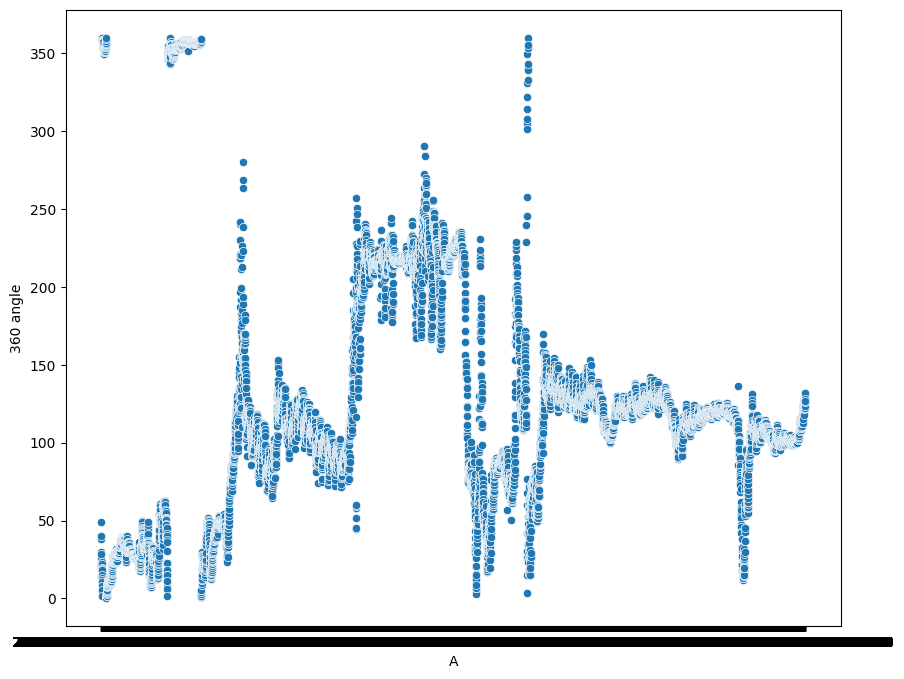

In [42]:
plt.figure(figsize=(10,8))
df_plot = df2[1792106:1804106][['A','360 angle','Up/down angle','Overall class']]
sns.scatterplot(data = df_plot,x = 'A', y = '360 angle')

<Axes: xlabel='A', ylabel='360 angle'>

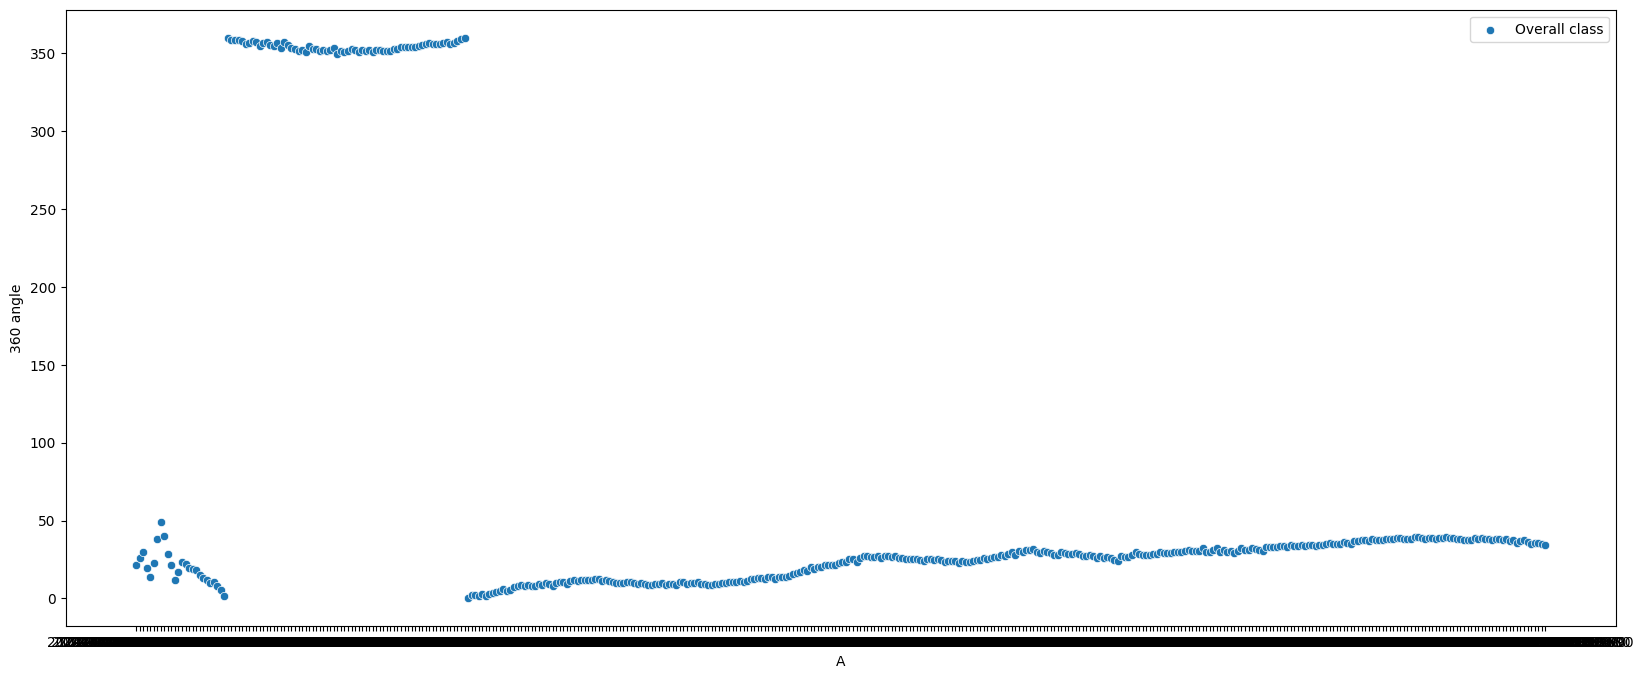

In [44]:
plt.figure(figsize=(20,8))
df_plot = df2[1792106:1792506][['A','360 angle','Up/down angle','Overall class']]
sns.scatterplot(data = df_plot,x = 'A', y = '360 angle',label = 'Overall class')

In [50]:
df2[df2['360 angle']>=350]

,A,B,C,D,360 angle,Up/down angle,Body Rotation,Prone-sit class,Supine-recline class,Overall class
7681,2024-11-26 14:24:28:820,0.0042,-0.9929,0.0872,357.242472,-84.975170,prone-sit,sitting,,sitting
7682,2024-11-26 14:24:28:830,0.0162,-0.9889,0.1030,351.061655,-83.981169,prone-sit,sitting,,sitting
7699,2024-11-26 14:24:29:000,0.0323,-0.8769,0.2020,350.915254,-76.868698,prone-sit,sitting,,sitting
7700,2024-11-26 14:24:29:010,0.0363,-0.8849,0.2218,350.705319,-75.749097,prone-sit,sitting,,sitting
7702,2024-11-26 14:24:29:030,0.0443,-0.9409,0.2575,350.238458,-74.480312,prone-sit,sitting,,sitting
...,...,...,...,...,...,...,...,...,...,...
8450872,2024-11-27 13:54:47:660,0.0363,-1.2368,0.4555,355.443577,-69.722908,prone-sit,sitting,,sitting
8450873,2024-11-27 13:54:47:670,0.0283,-1.1649,0.4040,355.993004,-70.829444,prone-sit,sitting,,sitting
8450874,2024-11-27 13:54:47:680,0.0604,-1.1009,0.3446,350.058429,-72.370345,prone-sit,sitting,,sitting
8450902,2024-11-27 13:54:47:960,0.0042,-1.0089,0.0357,353.290163,-87.959465,prone-sit,sitting,,sitting


In [10]:
from datetime import datetime

timestamp1 = "2024-11-27 13:54:50.990"
timestamp2 = "2024-11-26 14:23:12.010"

format = "%Y-%m-%d %H:%M:%S.%f"
time1 = datetime.strptime(timestamp1, format)
time2 = datetime.strptime(timestamp2, format)

time_difference = time1 - time2

print("Time Difference:", time_difference)

Time Difference: 23:31:38.980000
